# Time Series :
    A sequential set of data points measured over time.  
    x(t), t- variable that repersents the elapsed time and t=0,1,2,3,....
### How Time Series is special? 
    It is time dependent. So basic assumption of regression/classification model that the observations are independent doesn't hold in this. 

### Examples:
    Daily temperature
    monthly rain fall
    daily closing price of company stock
    continuous monitoring of a person's heart rate. 

# Auto Regression
    A linear model that uses the dependent relationship between an observation and some number of lagged observations.
    
\begin{equation*}
X_t=\phi_1 X_{t-1}+\phi_2 X_{t-1}....\phi_p X_{t-p}+ w_t \\
X_t= \sum_{i=1}^p \phi_i X_{t-i} + w_t \\
w_t : white noise \sim wn(0,\sigma _w ^2)
\end{equation*}

p : hyper parameter that repersents the length of the direct look back in the series

## Q1) Genarate a time series of 1000 data points with following AR(p) models.
1. AR(0) with $\sigma_w^2=0.3$
2. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.3$
3. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.9$
4. AR(2) with $\sigma_w^2=0.3 , \phi_1=0.4, \phi_2=0.4$
5. AR(2) with $\sigma_w^2=0.3 , \phi_1=0.4, \phi_2=-0.4$


Visualize all 5 time series using subplots and give proper legends and titles. 

In [1]:
import numpy as np

In [2]:
def AR(p,phi,var):
    x = []
    for j in np.arange(1000):
        if(j<p):
            x.append(np.sqrt(var)*np.random.randn())
        else:
            x_p = np.array([])
            for i in np.arange(p):
                x_p = np.append(x_p,x[j-i-1])
            x.append(np.matmul(phi,x_p) + np.sqrt(var)*np.random.randn())
    return(x)

In [3]:
phi = np.array([])
x_1 = AR(0,phi,0.3)

In [4]:
phi = np.array([0.3])
x_2 = AR(1,phi,0.3)

In [5]:
phi = np.array([0.9])
x_3 = AR(1,phi,0.3)

In [6]:
phi = np.array([0.4,0.4])
x_4 = AR(2,phi,0.3)

In [7]:
phi = np.array([0.4,-0.4])
x_5 = AR(2,phi,0.3)

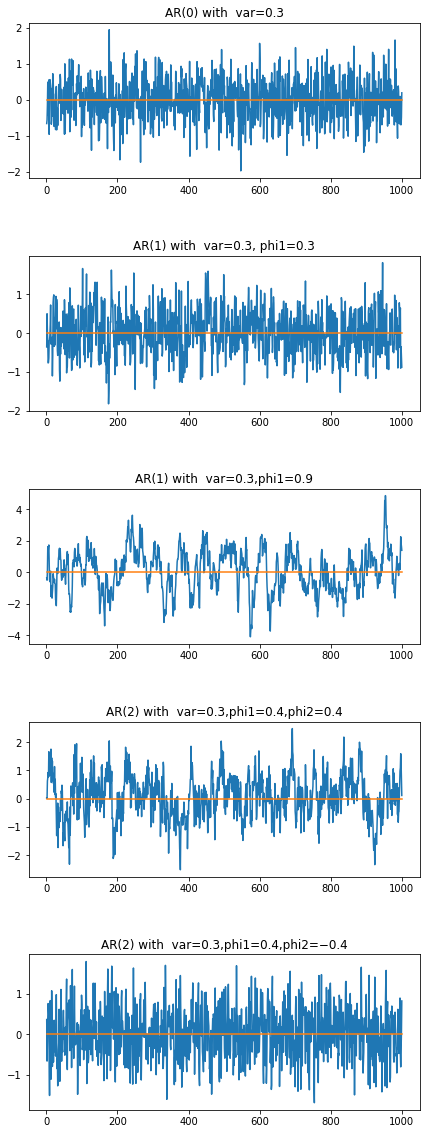

In [9]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(5,1,figsize=(7,20))
x = np.linspace(1,1000, 1000)
plt.subplots_adjust(hspace = 0.5)
axes[0].plot(x, x_1)
axes[0].plot(x,np.zeros(len(x)))
axes[0].title.set_text('AR(0) with  var=0.3')
axes[1].plot(x, x_2)
axes[1].plot(x,np.zeros(len(x)))
axes[1].title.set_text('AR(1) with  var=0.3, phi1=0.3')
axes[2].plot(x, x_3)
axes[2].plot(x,np.zeros(len(x)))
axes[2].title.set_text('AR(1) with  var=0.3,phi1=0.9')
axes[3].plot(x, x_4)
axes[3].plot(x,np.zeros(len(x)))
axes[3].title.set_text('AR(2) with  var=0.3,phi1=0.4,phi2=0.4')
axes[4].plot(x, x_5)
axes[4].plot(x,np.zeros(len(x)))
axes[4].title.set_text('AR(2) with  var=0.3,phi1=0.4,phi2=−0.4')

## Q2)  Genarate a time series of 1000 data points with following AR(p) models.
1. AR(1) with $\sigma_w^2=0.3 , \phi_1=1.005$
2. AR(1) with $\sigma_w^2=0.3 , \phi_1=-1.005$



Visualize the time series using subplots and give proper legends and titles. 
State how it is different from times series generated from Q1.

In [10]:
phi1 = np.array([1.005])
x_1 = AR(1,phi1,0.3)
phi2 = np.array([-1.005])
x_2 = AR(1,phi2,0.3)

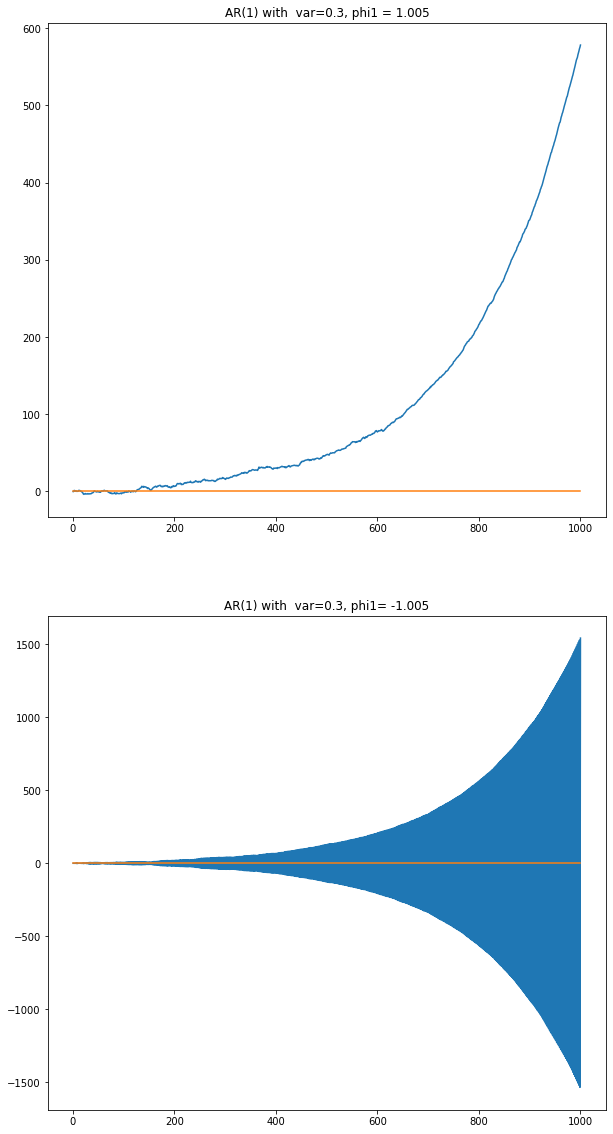

In [11]:
fig,axes = plt.subplots(2,1,figsize=(10,20))
x = np.linspace(1,1000, 1000)
plt.subplots_adjust(hspace = 0.2)
axes[0].plot(x, x_1)
axes[0].plot(x,np.zeros(len(x)))
axes[0].title.set_text('AR(1) with  var=0.3, phi1 = 1.005')
axes[1].plot(x, x_2)
axes[1].plot(x,np.zeros(len(x)))
axes[1].title.set_text('AR(1) with  var=0.3, phi1= -1.005')

## Q3) Generate AR(1)  time series of 1000 data points with following parameters and visualize their autocovariance. 
1. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.1$
2. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.8$
3. AR(1) with $\sigma_w^2=0.3 , \phi_1=-0.4$

## Auto covariance: 
 
$Cov(X_t, X_{t-k})=E[(X_t - \mu)(X_{t-k} -\mu)]$ <br>

$ Cov(X_t, X_{t-k})=\frac {1}{(N-1)} \sum_{i=0}^{N-k} ( x_i - \mu )( x_{i+k} - \mu )$ <br>

To identify the dominant periods in the time series.


In [12]:
def autocov(mean,n,k,x):
    sum = 0
    for i in range(0,(n-k)):
        sum = sum + ((x[i]-mean)*(x[i+k]-mean))
    return(sum/(n-1))

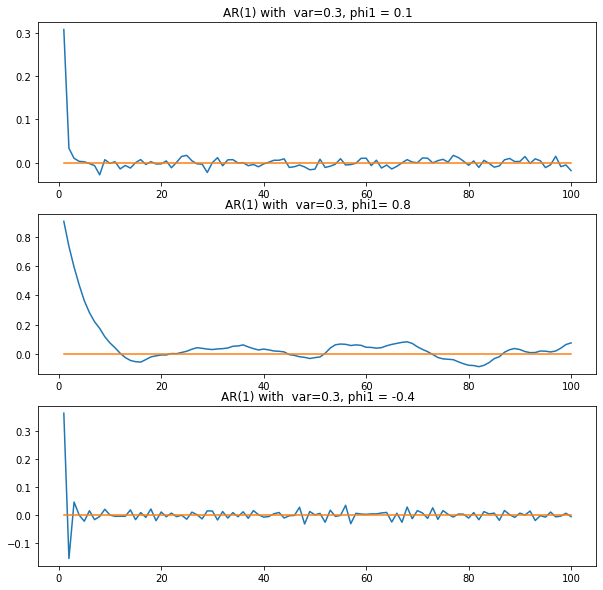

In [13]:
phi = np.array([0.1])
x_1 = AR(1,phi,0.3)
phi = np.array([0.8])
x_2 = AR(1,phi,0.3)
phi = np.array([-0.4])
x_3 = AR(1,phi,0.3)
mean1 = np.mean(x_1)
mean2 = np.mean(x_2)
mean3 = np.mean(x_3)
auto_cov1 = []
auto_cov2= []
auto_cov3 = []
for i in np.arange(100):
    auto_cov1.append(autocov(mean1,1000,i,x_1))
    auto_cov2.append(autocov(mean2,1000,i,x_2))
    auto_cov3.append(autocov(mean3,1000,i,x_3))
x = np.linspace(1,100,100)
fig,axes = plt.subplots(3,1,figsize=(10,10))
axes[0].plot(x, auto_cov1)
axes[0].plot(x,np.zeros(len(x)))
axes[0].title.set_text('AR(1) with  var=0.3, phi1 = 0.1')
axes[1].plot(x, auto_cov2)
axes[1].plot(x,np.zeros(len(x)))
axes[1].title.set_text('AR(1) with  var=0.3, phi1= 0.8')
axes[2].plot(x, auto_cov3)
axes[2].plot(x,np.zeros(len(x)))
axes[2].title.set_text('AR(1) with  var=0.3, phi1 = -0.4')

## Q4) Given an AR(1) model try to find its $\phi$. 
Dataset : ar_1.csv <br>
Noise  : $W_t \sim N(0,0.3)$ <br>
$X_t=\phi_1 X_{t-1}+ w_t$ <br>
Compute the $\phi$


In [14]:
import pandas as pd
ar1 = pd.read_csv('ar_1.csv')
mean = ar1['Data'].mean()
n = ar1.shape[0]
x = np.array(ar1['Data'])
cov = autocov(mean,n,1,x)
var = ar1['Data'].var()
phi = cov/var

In [15]:
phi

0.8260931652802264

## Q5) Try to fit and forcast time series for a given real time data set using inbuilt ar library. 
Dataset : Electricity_comsumption_hourly.csv
Predict last 12 data points and compare with the actual data point. 

Train anf test data :

X=data['DEOK_MW'].values <br>
train, test = X[1:len(X)-12], X[len(X)-12:]

Inbuilt AR function : from statsmodels.tsa.ar_model import AR

In [16]:
from statsmodels.tsa.ar_model import AR
data = pd.read_csv('Electricity_comsumption_hourly.csv')
X=data['DEOK_MW'].values
train, test = X[1:len(X)-12], X[len(X)-12:]
model = AR(train)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, True=%f' % (predictions[i], test[i]))

predicted=3869.472137, True=3865.000000
predicted=3805.973745, True=3824.000000
predicted=3796.575978, True=3766.000000
predicted=3797.108515, True=3776.000000
predicted=3890.598661, True=3885.000000
predicted=4097.286867, True=4200.000000
predicted=4260.151854, True=4393.000000
predicted=4310.203028, True=4426.000000
predicted=4307.501185, True=4419.000000
predicted=4252.261197, True=4355.000000
predicted=4146.984356, True=4224.000000
predicted=4053.067806, True=4100.000000
